In [8]:
#시각화를 위해 그래프를 쉽게 그릴 수 있도록 해주는 파이썬 라이브러리 손글씨 이미지로 확인해보는 간단한 예제
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

#dropout을 사용했을지라도 테스트데이터를 에측할시에는 전체를 사용할 수 있게 해야한다.
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784,256], stddev=0.01))
b1 = tf.Variable(tf.zeros([256]))
L1 = tf.add(tf.matmul(X,W1),b1)
L1 = tf.nn.relu(L1)
#dropout(tensor,사용할 뉴런의 비율)
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256,256], stddev=0.01))
b2 = tf.Variable(tf.zeros([256]))
L2 = tf.add(tf.matmul(L1,W2),b2)
L2 = tf.nn.relu(L2)
#dropout(tensor,사용할 뉴런의 비율)
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256,10], stddev=0.01))
b3 = tf.Variable(tf.zeros([10]))
model = tf.add(tf.matmul(L2, W3),b3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

#미니배치사용 크기 100개
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.8})
        total_cost += cost_val
        
       
    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost = ', ' {:.3f}'.format(total_cost / total_batch))
        #print('W3:', W3)
        #print('model:', model)
        #print(sess.run(model, feed_dict={X: mnist.test.images, Y: mnist.test.labels})[0])
        #print('is_correct:', is_correct)
        #print(sess.run(is_correct, feed_dict={X: mnist.test.images, Y:mnist.test.labels}))

    
print('최적화 완료!')

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost =   0.423
Epoch: 0002 Avg. cost =   0.165
Epoch: 0003 Avg. cost =   0.114
Epoch: 0004 Avg. cost =   0.090
Epoch: 0005 Avg. cost =   0.074
Epoch: 0006 Avg. cost =   0.062
Epoch: 0007 Avg. cost =   0.052
Epoch: 0008 Avg. cost =   0.045
Epoch: 0009 Avg. cost =   0.041
Epoch: 0010 Avg. cost =   0.036
Epoch: 0011 Avg. cost =   0.034
Epoch: 0012 Avg. cost =   0.029
Epoch: 0013 Avg. cost =   0.028
Epoch: 0014 Avg. cost =   0.027
Epoch: 0015 Avg. cost =   0.023
Epoch: 0016 Avg. cost =   0.024
Epoch: 0017 Avg. cost =   0.024
Epoch: 0018 Avg. cost =   0.021
Epoch: 0019 Avg. cost =   0.018
Epoch: 0020 Avg. cost =   0.022
Epoch: 0021 Avg. cost =   0.018
Epoch: 0022 Avg. cost =   0.018
Epoch: 0023 Avg. cost =   0.018
Epoch: 0024 Avg. cost =   0.018
Epoch: 0025 Avg. cost =   0.01

In [11]:
############################
#####결과확인(dropout사용)
############################
is_correct = tf.equal(tf.argmax(model,1), tf.argmax(Y,1))

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

print('정확도:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))#mnist.test

정확도: 0.9827


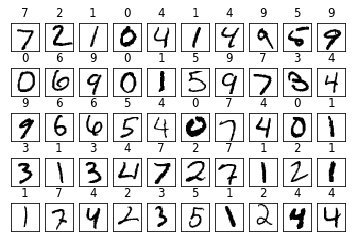

In [21]:
###########################################
#####결과확인(dropout사용, matplotilb 사용)
###########################################
labels = sess.run(model, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1})
fig = plt.figure()

for i in range(50):
    #5행 10열의 그래프 생성, i+1번째 숫자 이미지 출력
    subplot = fig.add_subplot(5, 10, i + 1)
    #x축 y축 눈금은 출력하지 않음
    subplot.set_xticks([100])
    subplot.set_yticks([100])
    #출력한 이미지 위에 에측한 숫자를 출력합니다.
    subplot.set_title('%d' % np.argmax(labels[i]))
    #i번째 images[i]를 28*28배열로 변형하여 이미지 출력
    #cmap=plt.cm.gray_r 이미지를 그레이스케일로 출력합니다.
    subplot.imshow(mnist.test.images[i].reshape((28,28)),cmap=plt.cm.gray_r)
#그래프 화면에 표시!
plt.show()